# **Project Name**    -   **EDA ANALAYSIS ON AMAZON PRIME**



##### **Project Type**    - EDA analysis of amazon prime
##### **Contribution**    - Individual
##### **Team Member 1 -** - Gaurang Dev Jevariya


# **Project Summary -**

In this project, we conducted an in-depth exploratory data analysis (EDA) on a merged dataset containing detailed information about titles available on Amazon Prime Video. The dataset included both metadata (like title, type, release year, IMDb and TMDb scores) and personnel data (like actor names and roles). Through systematic cleaning, visualization, and interpretation, we extracted several valuable insights that can support business decisions for content strategy, production, and recommendation systems.



# **GitHub Link -**

https://github.com/megaurang

# **Problem Statement**


Amazon Prime Video, a leading global streaming platform, offers a vast and diverse content library ranging from movies to TV shows, spanning multiple genres and certifications. However, with increasing competition and an ever-growing user base, it's crucial for Amazon to understand viewer preferences, content performance, and trends in their catalog. The main challenge is to analyze the large dataset of content and associated metadata to extract insights that can guide strategic decisions.

#### ** Business Objective**

The core business objective of this project is to
1. Understand User Preferences
2. Boost Viewer Engagement & Retention
3. Improve Content Curation & Acquisition
4. identify growth oppotunities

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
titles_df = pd.read_csv("titles.csv")
credits_df = pd.read_csv("credits.csv")

### Dataset First View

In [3]:
titles_df.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [4]:
credits_df.head()


,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [5]:
# merging the dataset on id' column
merged_df = pd.merge(titles_df, credits_df, on='id')

### Dataset Information

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    124347 non-null  object 
 1   title                 124347 non-null  object 
 2   type                  124347 non-null  object 
 3   description           124256 non-null  object 
 4   release_year          124347 non-null  int64  
 5   age_certification     56707 non-null   object 
 6   runtime               124347 non-null  int64  
 7   genres                124347 non-null  object 
 8   production_countries  124347 non-null  object 
 9   seasons               8153 non-null    float64
 10  imdb_id               119044 non-null  object 
 11  imdb_score            118296 non-null  float64
 12  imdb_votes            118272 non-null  float64
 13  tmdb_popularity       124332 non-null  float64
 14  tmdb_score            114082 non-null  float64
 15  

#### Duplicate Values

In [7]:
merged_df[merged_df.duplicated()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
9156,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0,130904,Buck Jones,Buck Roberts,ACTOR
9157,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0,36589,Tim McCoy,Marshal McCall,ACTOR
9158,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0,130905,Raymond Hatton,Sandy,ACTOR
9159,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0,132916,Christine McIntyre,Alice Borden,ACTOR
9160,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0,132381,Dave O'Brien,Joe Martin,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13145,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN,576342,Clarence Geldart,Dr. Fleming,ACTOR
13146,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN,60957,Edward LeSaint,Judge Harvey E. Blake,ACTOR
13147,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN,576620,Finis Barton,Gladys,ACTOR
13148,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN,137455,Sam Flint,Dr. Greenwood,ACTOR


In [8]:
# delete duplicate values
merged_df = merged_df.drop_duplicates()

In [9]:
merged_df.shape

(124179, 19)

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
missing_values = merged_df.isnull().sum()

In [11]:
# Visualizing the missing values
missing_values

id                           0
title                        0
type                         0
description                 91
release_year                 0
age_certification        67472
runtime                      0
genres                       0
production_countries         0
seasons                 116026
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10169
person_id                    0
name                         0
character                16277
role                         0
dtype: int64

### About  dataset?

dataset had many(169) duplicate values which we deleted, when we eyeball our data we see missing values in some columns for example in seasons there are many missing values which indicate that dataset mostly have movies


In [12]:
# Dataset Columns
merged_df.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
person_id                 int64
name                     object
character                object
role                     object
dtype: object

In [13]:
# Dataset Describe
merged_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,124179.000000,124179.000000,8153.000000,118128.000000,1.181040e+05,124164.000000,114010.000000,1.241790e+05
mean,1996.307186,95.577706,2.337790,5.968327,2.327575e+04,10.177932,5.991464,4.065843e+05
std,27.752141,30.166205,3.130184,1.242262,8.846004e+04,40.765311,1.321207,5.617204e+05
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000,1.000000e+00
25%,1983.000000,83.000000,1.000000,5.200000,2.890000e+02,1.886000,5.300000,3.898850e+04
50%,2009.000000,93.000000,1.000000,6.100000,1.257000e+03,3.896000,6.100000,1.339490e+05
75%,2017.000000,109.000000,2.000000,6.800000,7.074000e+03,8.795000,6.800000,5.712810e+05
max,2022.000000,540.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000,2.371153e+06


### Variables Description

- **id**: unique for each title (used to join both datasets).
- **title**: Name of the movie or TV show.
- **type**: whether the content is a "MOVIE" or a "SHOW".
- **description**: textual summary of the title.
- **release_year**: The year in which the title was released.
- **age_certification**: age rating .
- **runtime**: Duration in minutes.
- **genres**: genres  such as  Action, Comedy etc.
- **production_countries**: Countries where the title was produced.
- **seasons**: Number of seasons for movies.
- **imdb_id**:unique for the title on IMDb.
- **imdb_score**: IMDb rating (0-10 scale), (audience perception).
- **imdb_votes**: Number of votes received on IMDb(popularity).
- **tmdb_popularity**: Popularity from TMDB .
- **tmdb_score**: TMDB rating (0-10 scale), similar to IMDb score.
- **person_id**: Unique ID for a person (actor or director).
- **name**: Name of the person actor associated with the title.
- **character**: Character name played by the actor .
- **role**: Indicates whether the person is an "ACTOR" or a "DIRECTOR".

### Data Wrangling Code

In [14]:
# we already dropped the duplicate items, we will now deal with missing items
missing_values

id                           0
title                        0
type                         0
description                 91
release_year                 0
age_certification        67472
runtime                      0
genres                       0
production_countries         0
seasons                 116026
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10169
person_id                    0
name                         0
character                16277
role                         0
dtype: int64

In [15]:
df = merged_df.copy()

In [16]:
# fill missing description
df['description'] = df['description'].fillna('No Description')

In [17]:
# fill for age certification
df['age_certification'] = df['age_certification'].fillna('Unknown')

In [18]:
# Fill seasons with 0 
df['seasons'] = df['seasons'].fillna(0)

In [19]:
# replacing missing values of scores and popularity with median
df['imdb_score'] = df['imdb_score'].fillna(df['imdb_score'].median())
df['tmdb_score'] = df['tmdb_score'].fillna(df['tmdb_score'].median())
df['tmdb_popularity'] = df['tmdb_popularity'].fillna(df['tmdb_popularity'].median())
# here are outliners so it is best to use median, as mean would have given deviating results


In [20]:
#Fill missing characters 
df['character'] = df['character'].fillna('Unknown')

In [21]:
# drop the missing values in imdb id(very few-dont affect analysis)
df = df.dropna(subset=['imdb_id'])

In [22]:
# fill for missing scores
df['imdb_votes'] = df['imdb_votes'].fillna(df['imdb_votes'].median())

In [23]:
new_missing_values = df.isnull().sum()
new_missing_values

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
character               0
role                    0
dtype: int64

### manipulations done 

1. deleted duplicate entries from data set
2. found missing values
3. deleted / changed the missing values with appropriate things


In [24]:
#creating a checkpoint
copy_df = df.copy()

#### Chart - 1 horizontal bar chart for Top 10 Most Common Genres on Amazon Prime

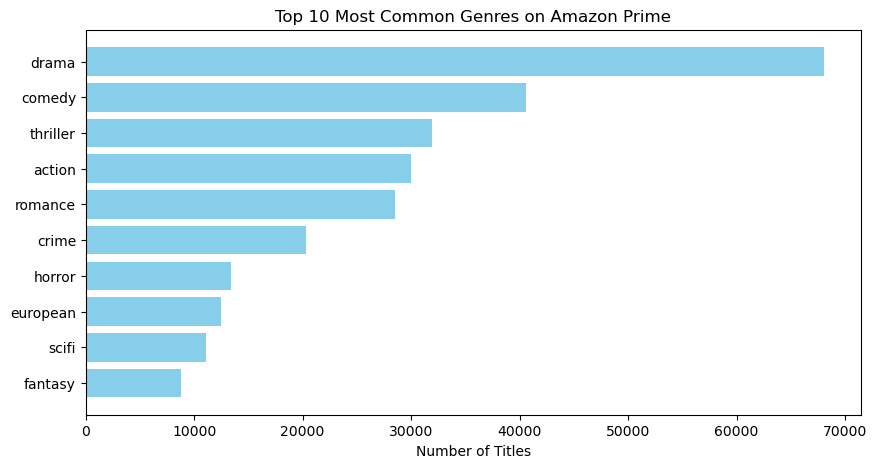

In [25]:
# Chart - 1 visualization code
import ast
from collections import Counter
import matplotlib.pyplot as plt

# Convert genre strings to lists
copy_df['genres'] = copy_df['genres'].apply(ast.literal_eval)

# Count all genres
genre_list = []
for g in copy_df['genres']:
    genre_list.extend(g)
    
# counting top genres
genre_counts = Counter(genre_list)
top_genres = genre_counts.most_common(10)

# Plotting
genres, counts = zip(*top_genres)
plt.figure(figsize=(10, 5))
plt.barh(genres, counts, color='skyblue')
plt.xlabel('Number of Titles')
plt.title('Top 10 Most Common Genres on Amazon Prime')
plt.gca().invert_yaxis()
plt.show()

##### 1. Why pick the specific chart

We used a bar chart to easily compare which genres appear the most on the platform

##### 2. insight(s) found from the chart

we see genres like drama, comedy, thriller are produced more

##### 3. Will the gained insights help creating a positive business impact?



genres like scifi, fantasy are less common because of high production cost and audience prefrences

#### Chart - 2 line chart for Number of Titles Released per Year

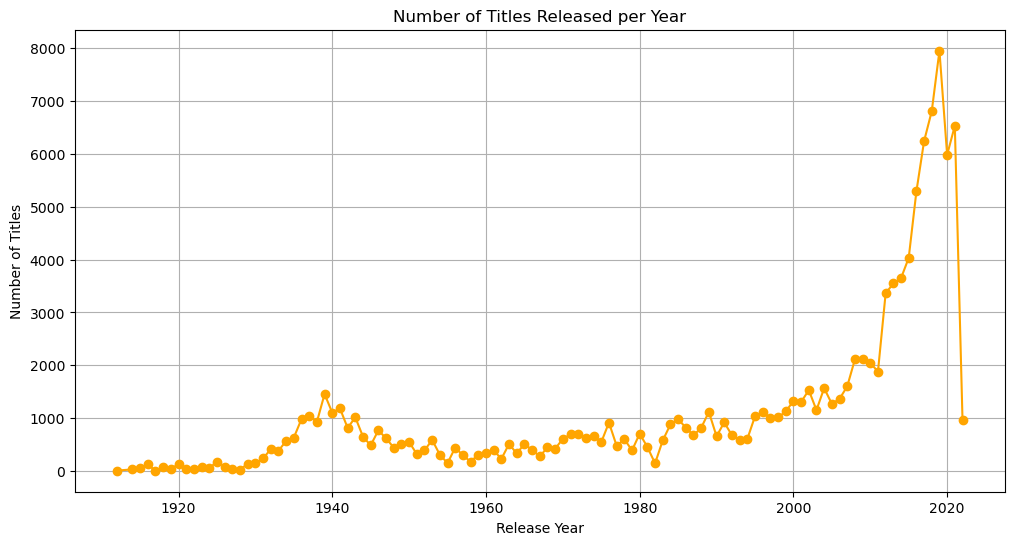

In [26]:
# Chart - 2 visualization code
#counting the year
year_counts = copy_df['release_year'].value_counts().sort_index()
#plotting
plt.figure(figsize=(12, 6))
plt.plot(year_counts.index, year_counts.values, color='orange', marker='o')
plt.title('Number of Titles Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

##### 1. Why pick the specific chart?

because it shows changes in production over the years

##### 2. insight(s) found from the chart

we can see spike in 2010's because here the the platfrom became very popular

##### 3. Will the gained insights help creating a positive business impact?


we see a drop around 2020 due to covid, it shows recent investments in amazon production

#### Chart - 3 histogram for Distribution of IMDb Scores

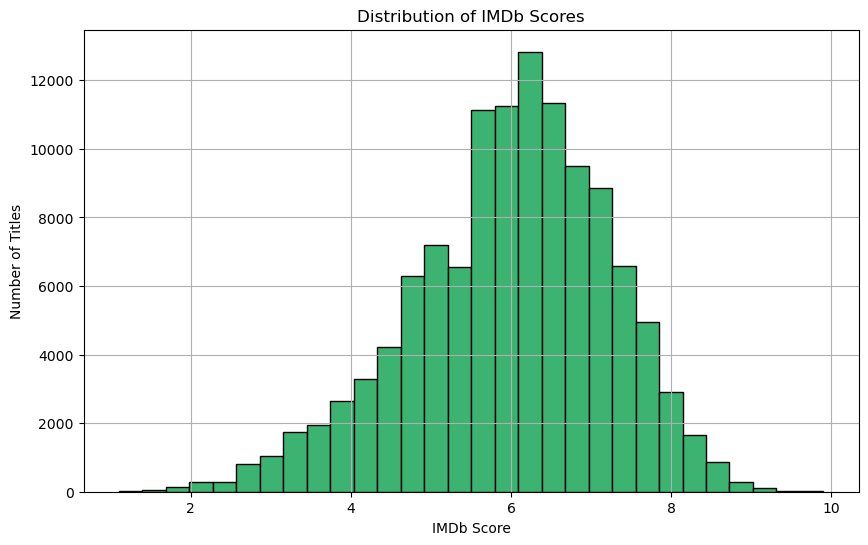

In [27]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
plt.hist(copy_df['imdb_score'], bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

##### 1. Why pick the specific chart?

we are able to see the number of titles in a specific range of imdb score

##### 2. insight(s) found from the chart

we can see most of the titles have more than average ratings

##### 3. Will the gained insights help creating a positive business impact?


the dip in below average and above average tells us there are less movies which were highly liked or highly disliked,
amazon should focus on promoting good rating shows
also the dip in imdb rating shows disliking of people, which sould be addressed in order to improve viewer trust

#### Chart - 4 pie chart for Distribution of Title Types on Amazon Prime

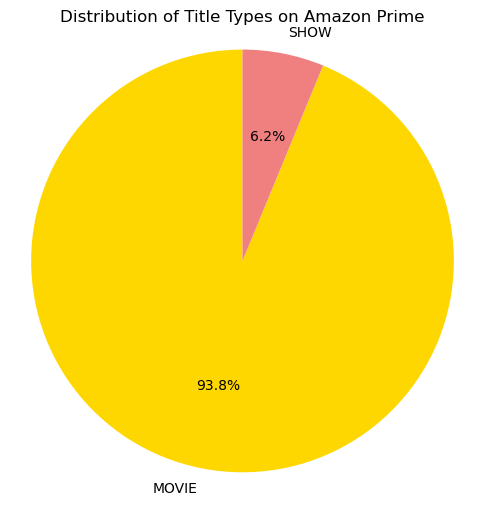

In [28]:
# Chart - 4 visualization code

# Count each type
type_counts = copy_df['type'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral'])
plt.title('Distribution of Title Types on Amazon Prime')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

##### 1. Why pick the specific chart?

because content is split between movies and shows 

##### 2. insight(s) found from the chart?

we can see the number of movies are more, means demanded by more people

##### 3. Will the gained insights help creating a positive business impact?


the dip is there because of the lenghty nature of a show, not many people can binge it
amazon should focus on getting more shows as it would create an even environment and binge watching audience will get more content

#### Chart - 5 histogram for Distribution of Content Runtime

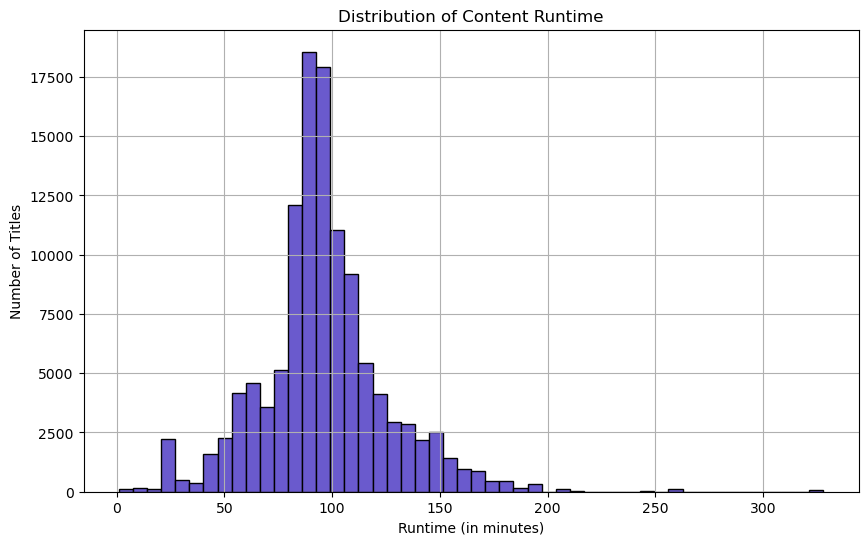

In [29]:
# Chart - 5 visualization code
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(copy_df['runtime'], bins=50, color='slateblue', edgecolor='black')
plt.title('Distribution of Content Runtime')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

##### 1. Why pick the specific chart?

because it shows number of titles in range of time duration

##### 2.insight(s) found from the chart

it shows most number of titles have time around 1:30 hours(more demanded) which are mostly movies

##### 3. Will the gained insights help creating a positive business impact?


content with longer duration time is less, we see small bars after 5 hrs duration, which shows there are audiences watching
long shows aswell, amazon should focus on creating them so that the dont loose thoose audiences

#### Chart - 6 bar chart for Average IMDb Score by Content Typ

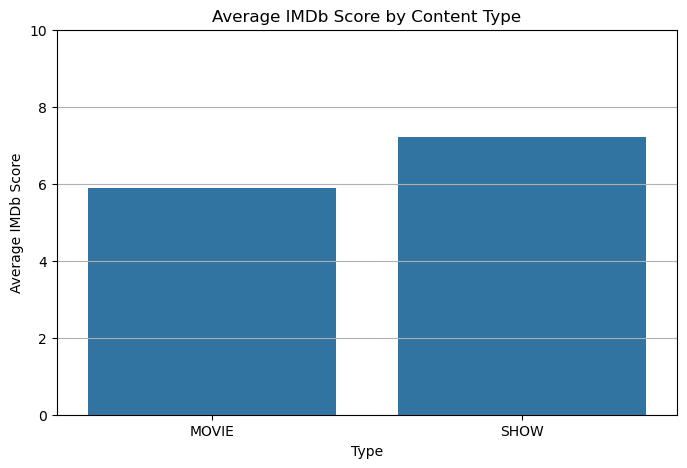

In [30]:
# Chart - 6 visualization code
import seaborn as sns
#seaborn for better statistical visualization

avg_score_by_type = copy_df.groupby('type')['imdb_score'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_score_by_type.index, y=avg_score_by_type.values)
plt.title('Average IMDb Score by Content Type')
plt.xlabel('Type')
plt.ylabel('Average IMDb Score')
plt.ylim(0, 10)
plt.grid(axis='y')
plt.show()

##### 1. Why pick the specific chart?

Bar chart is optimal to compare movies and shows avg. imdb score

##### 2. insight(s) found from the chart?

we can see shows have higher imdb than movies

##### 3. Will the gained insights help creating a positive business impact?


shows are liked more by audiences hence investment in shows will be beneficial for amazon

#### Chart - 7 bar chart for Top 10 Countries Producing the Most Content

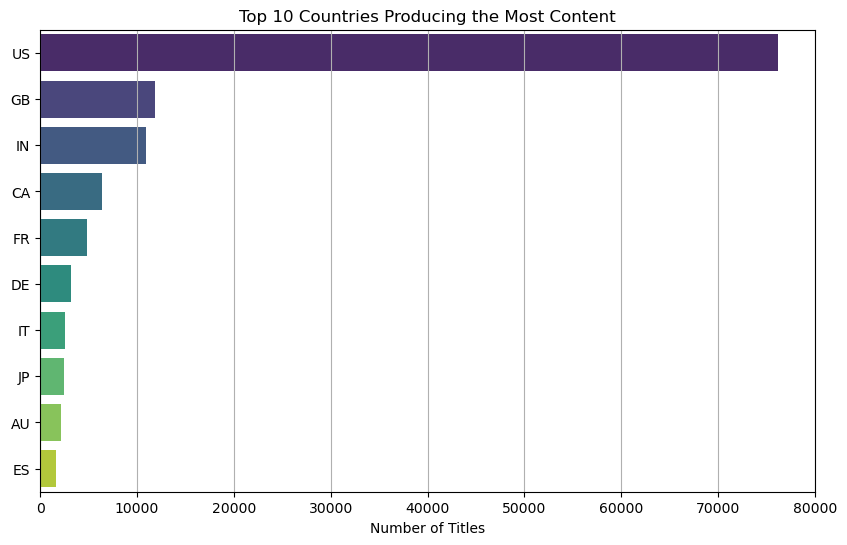

In [31]:
# Chart - 7 visualization code

# Convert production countries from string to list
copy_df['production_countries'] = copy_df['production_countries'].apply(ast.literal_eval)

# Count all countries
country_list = []
for c in copy_df['production_countries']:
    country_list.extend(c)

top_countries = Counter(country_list).most_common(10)

# Separate countries and counts
countries, counts = zip(*top_countries)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(countries), hue=list(countries), palette="viridis", legend=False)
plt.xlabel('Number of Titles')
plt.title('Top 10 Countries Producing the Most Content')
plt.grid(axis='x')
plt.show()


##### 1. Why pick the specific chart?

this chart easily compares number of titles produced by different countries

##### 2.insight(s) found from the chart?

we can see which countries contribute most to the amazon and also region based content on the platform

##### 3. Will the gained insights help creating a positive business impact?


we see us producing eponentially greater number of titles, this should be adressed as it may discourage people from different countries(producing less titles) to be on the platform, more investments should be done in countries like india and ggreat britain

#### Chart - 8 hexbin for Density of IMDb vs TMDB Scores


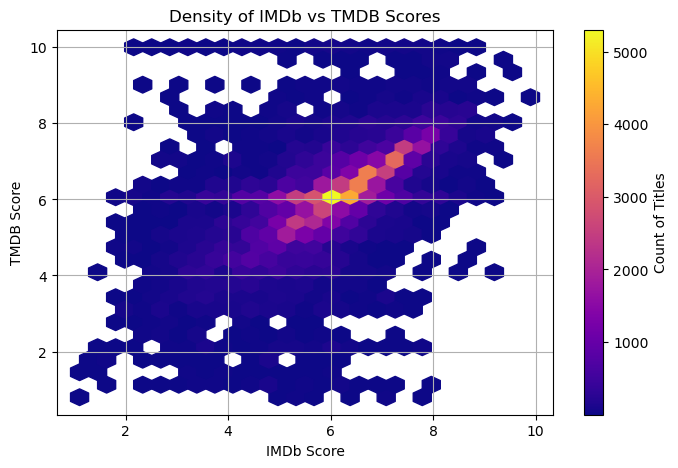

In [32]:
plt.figure(figsize=(8, 5))
plt.hexbin(copy_df['imdb_score'], copy_df['tmdb_score'], gridsize=25, cmap='plasma', mincnt=1)
plt.colorbar(label='Count of Titles')
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.title('Density of IMDb vs TMDB Scores')
plt.grid(True)
plt.show()

##### 1. Why pick the specific chart?

because this graph is good for comparing discrete values

##### 2.insight(s) found from the chart?

most number of titles have imdb and tmdb score between 4-8, and we see diagonal relation which means titles with high imdb score are famous

##### 3. Will the gained insights help creating a positive business impact?


we very few blue region in 4-6 tmdb score but have good imdb score which means the quality of these titles were good but there marketing/ promotion was not done to the extent, this should be looked into

#### Chart - 9 bar plot age certfication


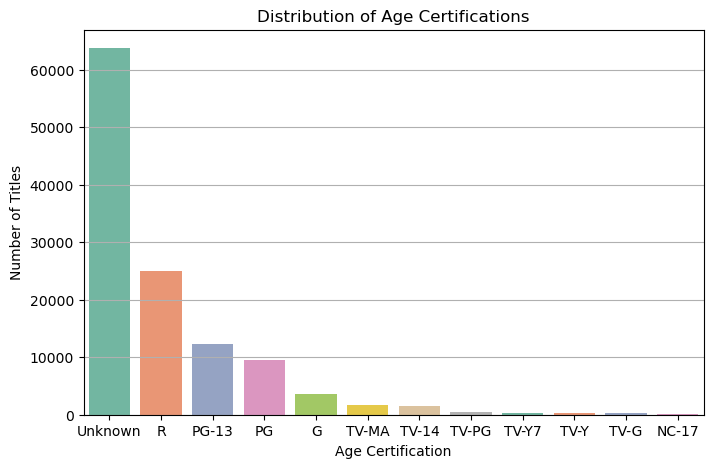

In [33]:
# Chart - 9 visualization code
# Count the occurrences of each age certification
age_counts = copy_df['age_certification'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=age_counts.index, y=age_counts.values, hue=age_counts.index, palette='Set2', legend=False)
plt.title('Distribution of Age Certifications')
plt.xlabel('Age Certification')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.show()

##### 1. Why pick the specific chart?

it is great for comparision between different ranges

##### 2.insight(s) found from the chart?

we see unknown showing highest numbers means most of the titles do not have age certification, and then R rated titles are much in demand meaning most of the audience are adult, and very few younger audience


##### 3. Will the gained insights help creating a positive business impact?


we see small bars for kids section, meaning there aren't man titles for younger generation, this can be worked upon to make more kids oriented titles 

#### Chart - 10 scatter plot of imdb score vs age

In [34]:
# Chart - 10 visualization code

plt.figure(figsize=(10, 6))
sns.barplot(x=top_people.values, y=top_people.index, color='skyblue')  # Use a single color
plt.title('Top 10 Most Active People in Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Person Name')
plt.grid(axis='x')
plt.show()

NameError: name 'top_people' is not defined

<Figure size 1000x600 with 0 Axes>

##### 1. Why pick the specific chart?

this can show in demand actors directors on amazon

##### 2.insight(s) found from the chart?

we see actors from the golden age of hollywood still dominating the field with most number of titles and popular directors Joseph Kane and Sam Newfield who have worked on many titles

##### 3. Will the gained insights help creating a positive business impact?


studying the works of top actors and directors can be beneficial for the company also work of the actor George 'Gabby' Hayes can be promoted as he was a popular artist of his time, this would bring more elderly people to the platform

#### Chart - 11 scatter plot Top 10 Titles: IMDb Score vs TMDb Popularity

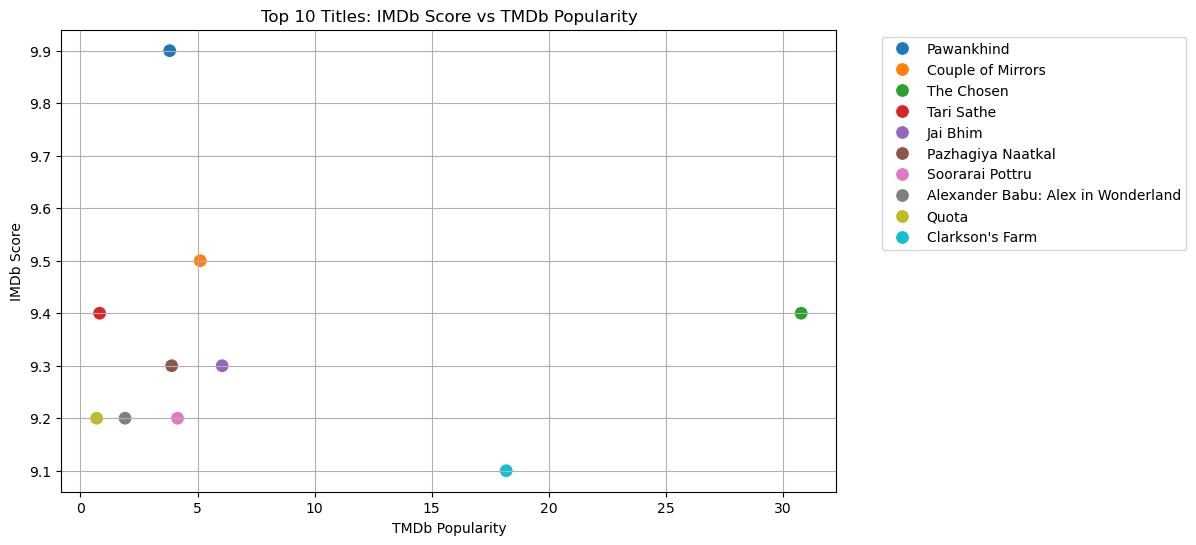

In [35]:
# code for chart 11
top_10 = copy_df.sort_values(by=['imdb_score', 'tmdb_popularity'], ascending=False)
top_10 = top_10.drop_duplicates('title').head(10)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_10, x='tmdb_popularity', y='imdb_score', hue='title', s=100, palette='tab10')
plt.title('Top 10 Titles: IMDb Score vs TMDb Popularity')
plt.xlabel('TMDb Popularity')
plt.ylabel('IMDb Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

##### 1. Why pick the specific chart?

This chart is great for analyzing imdb score and tmdb popularity for top titles

##### 2. What is/are the insight(s) found from the chart?


we see most of the good quality titles are less popular

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.`

There are plenty of titles which are less popular are are of great quality, also we should study what was different in "The Chosen" so it became this popular, these strategies should be applied to other shows aswell. Also it shows most of the good quality titles are'nt promoted well enough

## **Solution to Business Objective**

my suggestions would be 
1. Prioritize High-Rated Content Types

2. Focus on Popular and High-Engagement Genres

3. Improve Age Certification Clarity

4. Fill Metadata Gaps to Strengthen Recommendations

5. Utilize Ratings & Popularity for Strategic Promotions

6. Consider Seasonal Trends in Content Release

7. Optimize Content Length by Audience

8. Reassess Low-Rated or Outdated Content

9. Highlight Top Performers 

10. Encourage User Ratings & Reviews

# **Conclusion**

We analyzed the data and found useful trends about Amazon Prime’s content — like which genres are most popular, which content types perform better, and how different age groups are targeted. These insights can help Amazon Prime choose better content, keep users happy, and grow their platform. Fixing missing data and focusing on what works well will lead to better decisions and stronger results for the business.